In [2]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math

In [8]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pens = pd.read_sql('SELECT * FROM Pens', con=db_connection)
pens['note'] = pens['note'].astype('category')
pens['registered'].replace(0, np.nan, inplace=True)
pens['registered'] = pd.to_datetime(pens['registered'], unit='s')
pens['lastmodified'].replace(0, np.nan, inplace=True)
pens['lastmodified'] = pd.to_datetime(pens['lastmodified'], unit='s')
pens['disabled'].replace(0, np.nan, inplace=True)
pens['disabled'] = pd.to_datetime(pens['disabled'], unit='s')
pens['retired'].replace(0, np.nan, inplace=True)
pens['retired'] = pd.to_datetime(pens['retired'], unit='s')

pens.sort_values(by='registered', inplace=True)

In [9]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 300)

In [10]:
pens

,id,registered_by_user_id,registered_by_api_key,registered,lastmodified,disabled,retired,note,uid,retired_by_user_id,disabled_by_user_id
0,1,3,777677,2014-05-22 16:07:20,2015-01-30 23:21:37,2015-01-30 23:21:37,2015-01-30 23:21:37,millerfox,6b6bb53fb257abdf,3,3
1,2,3,777677,2014-05-22 16:07:29,2015-01-30 23:24:15,2015-01-30 23:24:15,NaT,millerfox,533dcbd9d4ed45f0,0,3
2,3,3,777677,2014-05-22 16:07:53,2014-11-14 23:34:05,NaT,NaT,millerfox,fc83486cd48f21d5,0,0
3,4,3,777677,2014-05-22 16:07:59,2014-11-14 23:34:05,NaT,NaT,millerfox,29835c28eed2bf63,0,0
4,5,3,777677,2014-05-22 16:08:09,2014-11-14 23:34:05,NaT,NaT,millerfox,c780a4881f6e3d2a,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3248,3860039,3,0,2015-04-03 19:09:07,NaT,NaT,NaT,production 20150301,91FF826F17001D00,0,0
3246,3860035,3,0,2015-04-03 19:09:07,NaT,NaT,NaT,production 20150301,91FF826F1A002600,0,0
3254,3860071,3,0,2015-04-03 19:09:07,NaT,NaT,NaT,production 20150301,91FF826F19001100,0,0
3249,3860041,3,0,2015-04-03 19:09:07,NaT,NaT,NaT,production 20150301,91FF826F19000100,0,0


In [7]:
pens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3256 non-null   int64         
 1   registered_by_user_id  3256 non-null   int64         
 2   registered_by_api_key  3256 non-null   int64         
 3   registered             3256 non-null   datetime64[ns]
 4   lastmodified           2985 non-null   datetime64[ns]
 5   disabled               2 non-null      datetime64[ns]
 6   retired                1 non-null      datetime64[ns]
 7   note                   3256 non-null   category      
 8   uid                    3256 non-null   object        
 9   retired_by_user_id     3256 non-null   int64         
 10  disabled_by_user_id    3256 non-null   int64         
dtypes: category(1), datetime64[ns](4), int64(5), object(1)
memory usage: 258.4+ KB


In [12]:
pens[pens['id'].duplicated()]

,id,registered_by_user_id,registered_by_api_key,registered,lastmodified,disabled,retired,note,uid,retired_by_user_id,disabled_by_user_id


In [ ]:
#total 3256 pens were registered 
#the last one in 2015-04

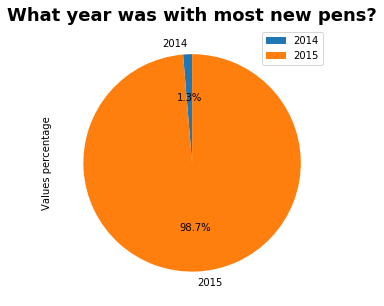

In [16]:
pen_regitered = pens['registered'].groupby(pens.registered.dt.to_period("Y")).agg('count')

plt.figure(figsize=(8,5))
plt.title('What year was with most new pens?', fontdict={'fontweight': 'bold', 'fontsize':18})
pen_regitered.plot.pie(y='start', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.ylabel('Values percentage')
plt.legend()
# plt.savefig('yearly_checkouts.png', dpi=300)

In [20]:
pen_regitered_monthly = pens['registered'].groupby(pens.registered.dt.to_period("M")).agg('count')
pen_regitered_monthly.nlargest()


registered
2015-02    3177
2015-04      26
2014-12      23
2014-11      10
2015-03      10
Freq: M, Name: registered, dtype: int64

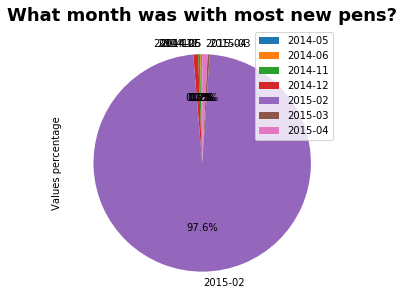

In [17]:
plt.figure(figsize=(8,5))
plt.title('What month was with most new pens?', fontdict={'fontweight': 'bold', 'fontsize':18})
pen_regitered_monthly.plot.pie(y='start', figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.ylabel('Values percentage')
plt.legend()

## summerize findings

In [23]:
findings = [{'total_registered_pens': '3,256', 'last_register':'2015-05', 'top_year': '2015 with 98.7%', 
            'top_month': '2015-02 with 97.6%, which is 3,177 pens'}]

pens_finding = pd.DataFrame(findings)

In [25]:
pens_finding.transpose()

,0
total_registered_pens,"3,256"
last_register,2015-05
top_year,2015 with 98.7%
top_month,"2015-02 with 97.6%, which is 3,177 pens"
